**Problem Statement:**

Insurance companies need to accurately predict the cost of health insurance for individuals to set premiums appropriately. However, traditional methods of cost prediction often rely on broad actuarial tables and historical averages, which may not account for the nuanced differences among individuals. By leveraging machine learning techniques, insurers can predict more accurately the insurance costs tailored to individual profiles, leading to more competitive pricing and better risk management.

* The primary need for this project arises from the challenges insurers face in pricing policies accurately while remaining competitive in the market. Inaccurate predictions can lead to losses for insurers and unfairly high premiums for policyholders. By implementing a machine learning model, insurers can:
* Enhance Precision in Pricing: Use individual data points to determine premiums that reflect actual risk more closely than generic estimates.
* Increase Competitiveness: Offer rates that are attractive to consumers while ensuring that the pricing is sustainable for the insurer.
* Improve Customer Satisfaction: Fair and transparent pricing based on personal health data can increase trust and satisfaction among policyholders.
Enable Personalized Offerings: Create customized insurance packages based on predicted costs, which can cater more directly to the needs and preferences of individuals.
* Risk Assessment: Insurers can use the model to refine their risk assessment processes, identifying key factors that influence costs most significantly.
* Policy Development: The insights gained from the model can inform the development of new insurance products or adjustments to existing ones.
* Strategic Decision Making: Predictive analytics can aid in broader strategic decisions, such as entering new markets or adjusting policy terms based on risk predictions.
* Customer Engagement: Insights from the model can be used in customer engagement initiatives, such as personalized marketing and tailored advice for policyholders.

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from scipy import stats
import statsmodels.api as sm
import statsmodels.formula.api as smf

import warnings
warnings.filterwarnings('ignore')

**Data description:**

The dataset comprises the following 11 attributes:
* Age: Numeric, ranging from 18 to 66 years.
* Diabetes: Binary (0 or 1), where 1 indicates the presence of diabetes.
* BloodPressureProblems: Binary (0 or 1), indicating the presence of blood pressure-related issues.
* AnyTransplants: Binary (0 or 1), where 1 indicates the person has had a transplant.
* AnyChronicDiseases: Binary (0 or 1), indicating the presence of any chronic diseases.
* Height: Numeric, measured in centimeters, ranging from 145 cm to 188 cm.
* Weight: Numeric, measured in kilograms, ranging from 51 kg to 132 kg.
* KnownAllergies: Binary (0 or 1), where 1 indicates known allergies.
* HistoryOfCancerInFamily: Binary (0 or 1), indicating a family history of cancer.
* NumberOfMajorSurgeries: Numeric, counting the number of major surgeries, ranging from 0 to 3 surgeries.
* PremiumPrice: Numeric, representing the premium price in currency, ranging from 15,000 to 40,000.

In [2]:
df = pd.read_csv('/content/insurance.csv')
df.head()

,Age,Diabetes,BloodPressureProblems,AnyTransplants,AnyChronicDiseases,Height,Weight,KnownAllergies,HistoryOfCancerInFamily,NumberOfMajorSurgeries,PremiumPrice
0,45,0,0,0,0,155,57,0,0,0,25000
1,60,1,0,0,0,180,73,0,0,0,29000
2,36,1,1,0,0,158,59,0,0,1,23000
3,52,1,1,0,1,183,93,0,0,2,28000
4,38,0,0,0,1,166,88,0,0,1,23000


In [3]:
df.shape

(986, 11)

**Dataset Overview**

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 986 entries, 0 to 985
Data columns (total 11 columns):
 #   Column                   Non-Null Count  Dtype
---  ------                   --------------  -----
 0   Age                      986 non-null    int64
 1   Diabetes                 986 non-null    int64
 2   BloodPressureProblems    986 non-null    int64
 3   AnyTransplants           986 non-null    int64
 4   AnyChronicDiseases       986 non-null    int64
 5   Height                   986 non-null    int64
 6   Weight                   986 non-null    int64
 7   KnownAllergies           986 non-null    int64
 8   HistoryOfCancerInFamily  986 non-null    int64
 9   NumberOfMajorSurgeries   986 non-null    int64
 10  PremiumPrice             986 non-null    int64
dtypes: int64(11)
memory usage: 84.9 KB


**Summary Statistics**

In [5]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
Age,986.0,41.745436,13.963371,18.0,30.0,42.0,53.0,66.0
Diabetes,986.0,0.419878,0.493789,0.0,0.0,0.0,1.0,1.0
BloodPressureProblems,986.0,0.468560,0.499264,0.0,0.0,0.0,1.0,1.0
AnyTransplants,986.0,0.055781,0.229615,0.0,0.0,0.0,0.0,1.0
AnyChronicDiseases,986.0,0.180527,0.384821,0.0,0.0,0.0,0.0,1.0
Height,986.0,168.182556,10.098155,145.0,161.0,168.0,176.0,188.0
Weight,986.0,76.950304,14.265096,51.0,67.0,75.0,87.0,132.0
KnownAllergies,986.0,0.215010,0.411038,0.0,0.0,0.0,0.0,1.0
HistoryOfCancerInFamily,986.0,0.117647,0.322353,0.0,0.0,0.0,0.0,1.0
NumberOfMajorSurgeries,986.0,0.667343,0.749205,0.0,0.0,1.0,1.0,3.0


**Insights:**

**Age**
- **Mean**: 41.7 years (Range: 18 – 66)
- Balanced spread across young to older adults. Median of 42 suggests even distribution.

**Diabetes**
- **42%** of individuals have diabetes.
- Substantial enough for meaningful comparison of premiums between diabetic and non-diabetic groups.

**Blood Pressure Problems**
- Present in **47%** of the data.
- Almost evenly split, indicating strong potential for hypothesis testing and premium impact analysis.

**Any Transplants**
- Only **5.6%** have undergone a transplant.
- Though rare, transplants are medically significant and likely influence higher premiums.

**Any Chronic Diseases**
- **18%** of individuals report chronic diseases.
- Important feature to explore in hypothesis testing and modeling.

**Height & Weight**
- **Height**: Mean = 168.2 cm  
- **Weight**: Mean = 76.95 kg  
- Good candidates for calculating **BMI**, a health risk factor often linked to insurance costs.

**Known Allergies**
- **21.5%** have known allergies.
- Worth testing for any statistical relationship with premium pricing.

**History of Cancer in Family**
- Reported by **11.8%** of individuals.
- Low frequency but potential high influence on health risk and future premiums.

**Number of Major Surgeries**
- **Mean**: ~0.67, Max = 3 surgeries
- Most have 0 or 1 surgery. Strong candidate for ANOVA or regression analysis on premium price.

**Premium Price**
- **Mean**: ₹24,336 (Range: ₹15,000 – ₹40,000)
- Wide spread (Std Dev = ₹6,248), with IQR between ₹21,000 and ₹28,000.
- Indicates room for predictive modeling and segmentation.

**Summary Table of Key Insights**

| Feature                      | Observation |
|------------------------------|-------------|
| **Age**                      | Balanced age groups, median = 42 |
| **Diabetes & BP Problems**   | Affect 40–47% of sample |
| **Transplants & Cancer**     | Rare but critical for modeling |
| **BMI (via Height & Weight)**| Important health indicator |
| **Surgeries**                | Range from 0 to 3, affects premium pricing |
| **Premium Price**            | High variability; key target variable |



**Checking for Null Values**

In [6]:
df.isnull().sum()

,0
Age,0
Diabetes,0
BloodPressureProblems,0
AnyTransplants,0
AnyChronicDiseases,0
Height,0
Weight,0
KnownAllergies,0
HistoryOfCancerInFamily,0
NumberOfMajorSurgeries,0


**BMI**

In [7]:
# Adding BMI column
df['BMI'] = df['Weight'] / ((df['Height'] / 100) ** 2)

**EDA**

In [8]:
# Numeric variables
num_cols = ['Age', 'Height', 'Weight', 'BMI', 'NumberOfMajorSurgeries', 'PremiumPrice']

# Binary categorical (0/1) variables
binary_cats = ['Diabetes', 'BloodPressureProblems', 'AnyTransplants',
               'AnyChronicDiseases', 'KnownAllergies', 'HistoryOfCancerInFamily']

**Histograms / KDE Plots for Continuous Variables**

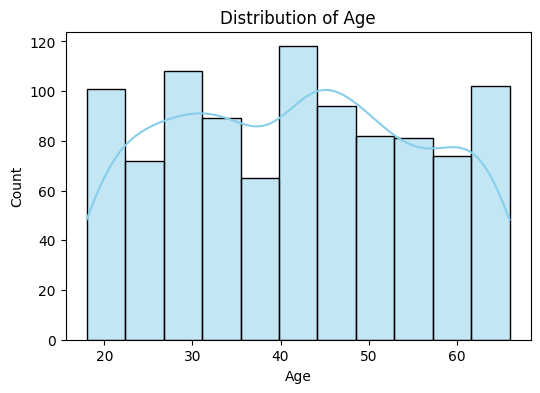

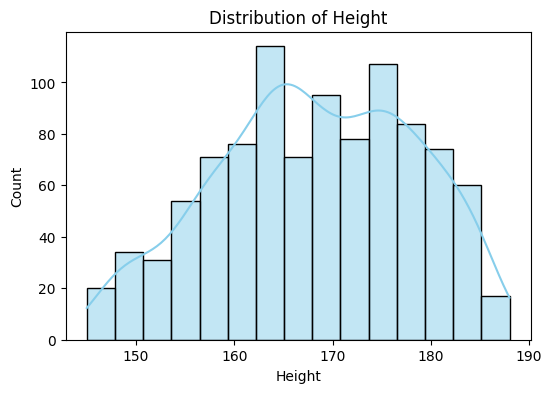

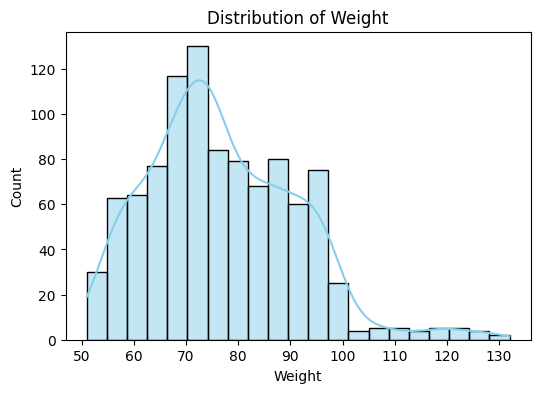

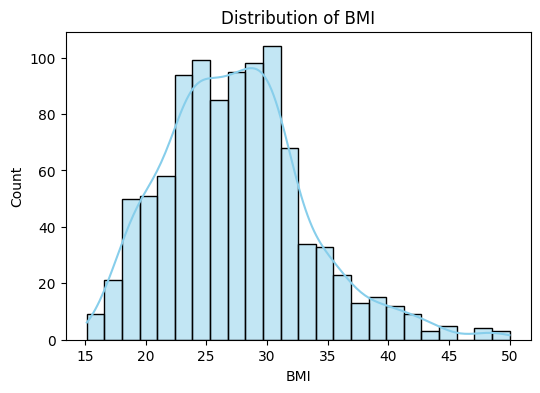

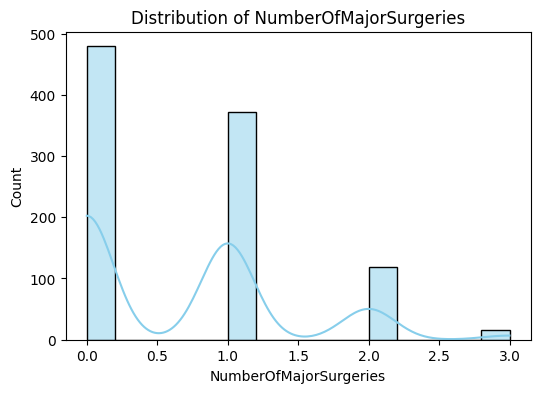

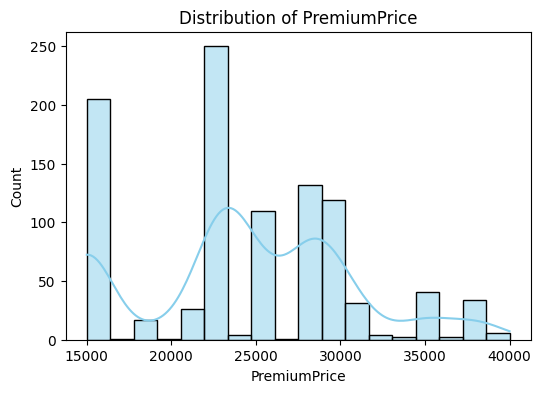

In [9]:
for col in num_cols:
    plt.figure(figsize=(6, 4))
    sns.histplot(df[col], kde=True, color='skyblue')
    plt.title(f'Distribution of {col}')
    plt.show()

**Boxplots to detect outliers**

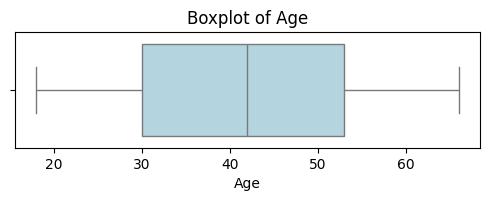

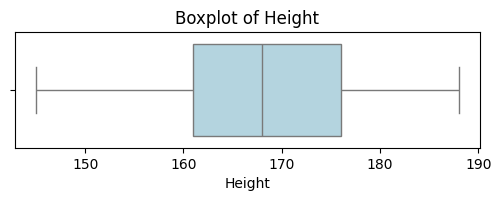

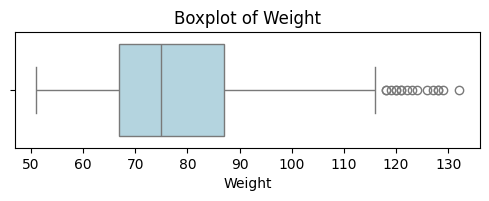

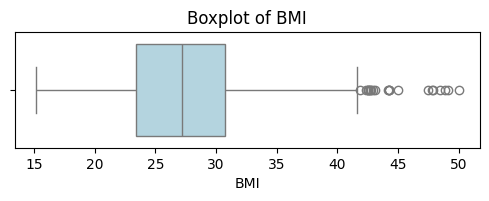

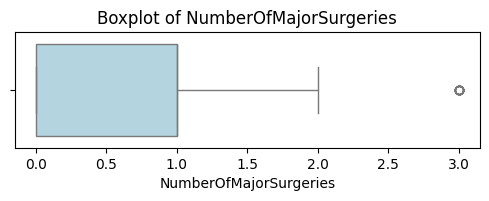

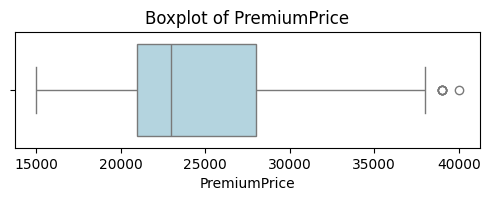

In [10]:
for col in num_cols:
    plt.figure(figsize=(6, 1.5))
    sns.boxplot(x=df[col], color='lightblue')
    plt.title(f'Boxplot of {col}')
    plt.show()

In [11]:
Q1 = df['PremiumPrice'].quantile(0.25)
Q3 = df['PremiumPrice'].quantile(0.75)
IQR = Q3 - Q1
lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR
outliers = df[(df['PremiumPrice'] < lower_bound) | (df['PremiumPrice'] > upper_bound)]

print(f"Number of outliers: {outliers.shape[0]}")

Number of outliers: 6


**Correlation Analysis**

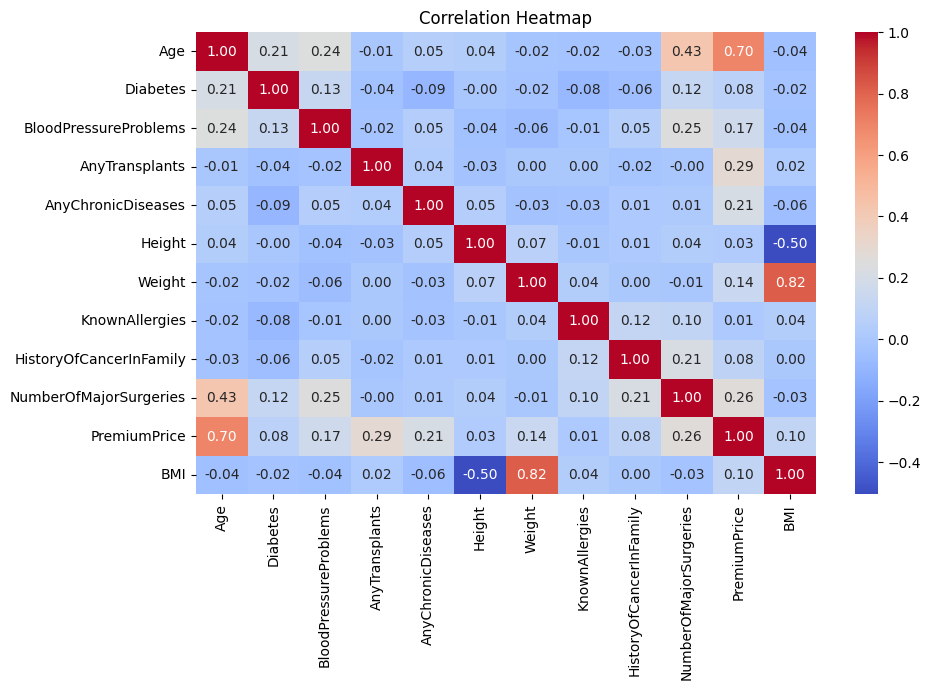

In [12]:
plt.figure(figsize=(10, 6))
corr = df.corr()
sns.heatmap(corr, annot=True, cmap='coolwarm', fmt=".2f")
plt.title('Correlation Heatmap')
plt.show()

**Insights:**

**Correlation Heatmap Insights**

Here r refers to the Correlation Coefficient
**Strongest Predictor of Premium**
- **Age** has the **strongest positive correlation** with `PremiumPrice` (**r = 0.70**).
  - Older individuals are associated with higher insurance premiums.

**Moderate Predictors of Premium**
- **AnyTransplants** (r = 0.29): Moderate positive relationship.
- **NumberOfMajorSurgeries** (r = 0.26): More surgeries → higher premiums.
- **AnyChronicDiseases** (r = 0.21): Somewhat linked with higher premiums.
- **BloodPressureProblems** (r = 0.17): Weak-moderate positive correlation.

**Weak or No Correlation with Premium**
- **Diabetes** (r = 0.08), **Weight** (r = 0.14), **HistoryOfCancerInFamily** (r = 0.08), **KnownAllergies** (r = 0.01): Very low or negligible correlation.
- **BMI** (r = 0.10): Surprisingly weak correlation with premium in this dataset.

**Notable Negative Correlations**
- **BMI vs. Height**: r = **−0.50** — expected, since taller individuals with same weight have lower BMI.
- No variable shows a meaningful negative correlation with `PremiumPrice`.

**Strong Feature Interdependencies**
- **Weight vs. BMI**: r = **0.82** — strong and expected correlation.
- **Height vs. BMI**: r = **−0.50** — inverse relation by formula.

**BMI Scatterplot with Premium**

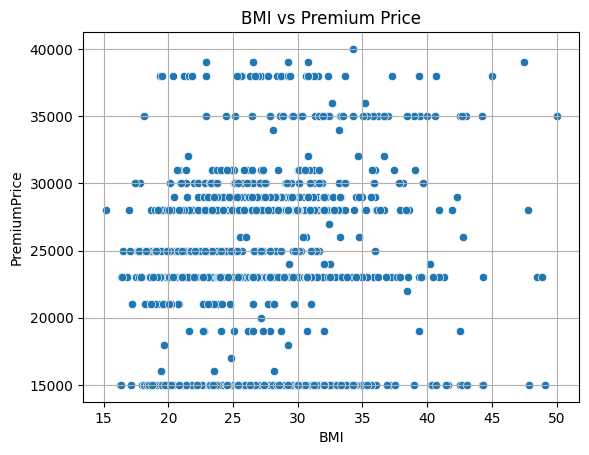

In [13]:
sns.scatterplot(x='BMI', y='PremiumPrice', data=df)
plt.title('BMI vs Premium Price')
plt.grid(True)
plt.show()

**Boxplots for Binary Variables vs Premium**

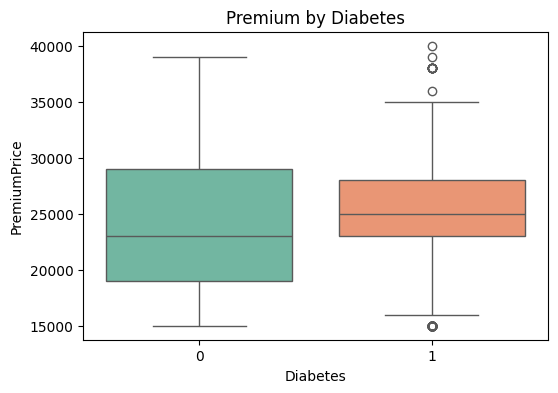

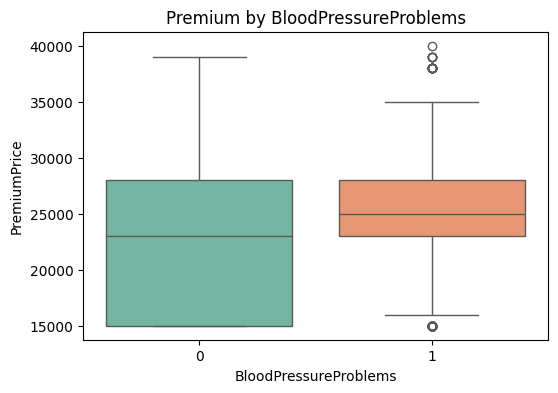

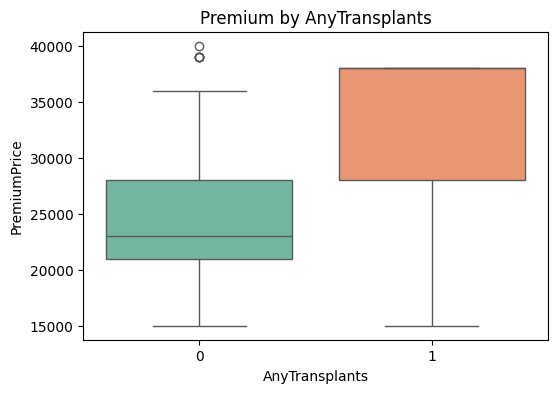

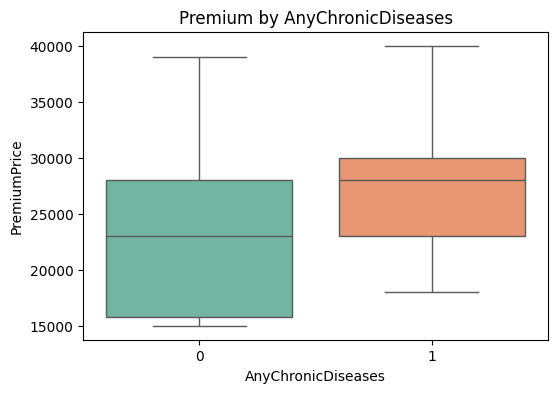

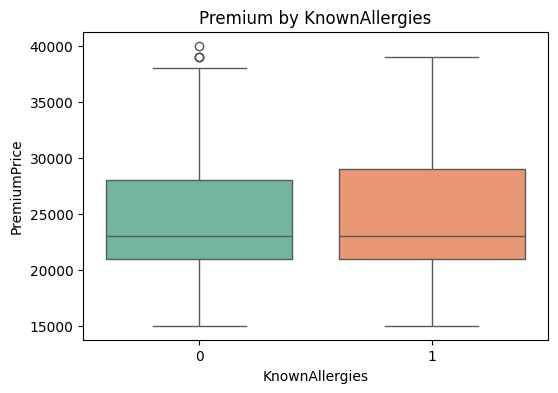

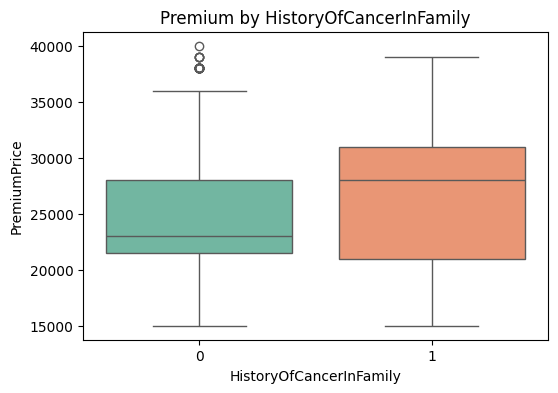

In [14]:
for cat in binary_cats:
    plt.figure(figsize=(6, 4))
    sns.boxplot(x=df[cat], y=df['PremiumPrice'], palette='Set2')
    plt.title(f'Premium by {cat}')
    plt.show()

In [15]:
df[df['PremiumPrice'].isin(outliers['PremiumPrice'])]

,Age,Diabetes,BloodPressureProblems,AnyTransplants,AnyChronicDiseases,Height,Weight,KnownAllergies,HistoryOfCancerInFamily,NumberOfMajorSurgeries,PremiumPrice,BMI
204,27,0,1,0,0,159,120,1,1,1,39000,47.466477
295,64,1,1,0,1,163,91,0,0,2,40000,34.250442
926,24,0,1,0,0,159,67,0,0,0,39000,26.502116
928,19,0,0,0,0,171,67,0,0,1,39000,22.913033
976,21,0,1,0,0,155,74,0,0,0,39000,30.801249
984,47,1,1,0,0,158,73,1,0,1,39000,29.242109


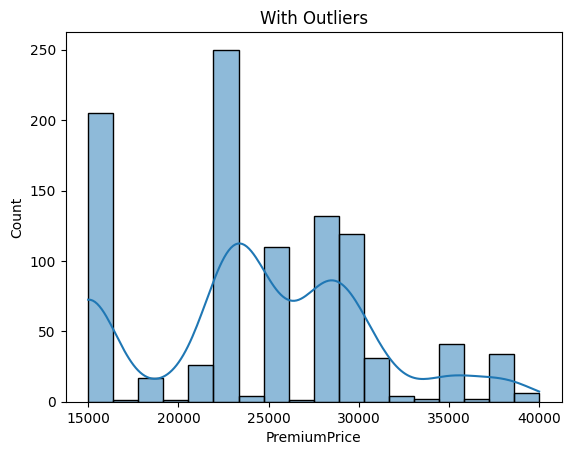

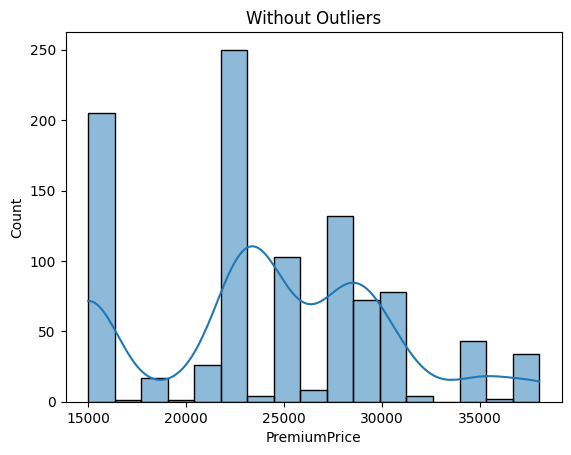

In [16]:
# Histogram before removing outliers
sns.histplot(df['PremiumPrice'], kde=True)
plt.title('With Outliers')
plt.show()

# Histogram after removing outliers
df_wo = df[~df['PremiumPrice'].isin(outliers['PremiumPrice'])]
sns.histplot(df_wo['PremiumPrice'], kde=True)
plt.title('Without Outliers')
plt.show()

Since we found only 6 outliers and our PremiumPrice max is 40,000, it's likely they represent genuine high-risk profiles (older, chronic diseases, surgeries)

**BMI Category**

In [17]:
def categorize_bmi(bmi):
    if bmi < 18.5:
        return 'Underweight'
    elif 18.5 <= bmi < 25:
        return 'Normal'
    elif 25 <= bmi < 30:
        return 'Overweight'
    else:
        return 'Obese'

df['BMI_Category'] = df['BMI'].apply(categorize_bmi)

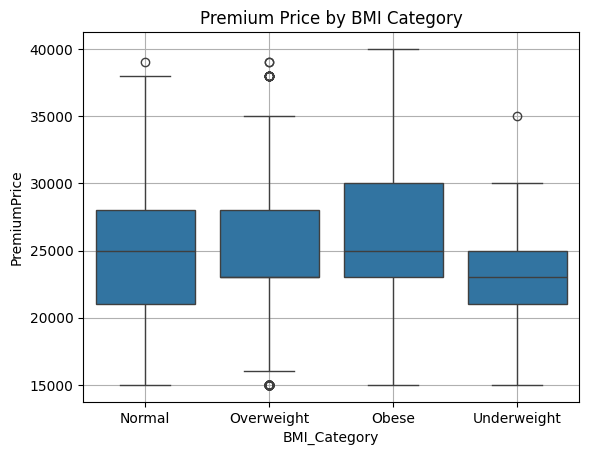

In [18]:
sns.boxplot(x='BMI_Category', y='PremiumPrice', data=df)
plt.title('Premium Price by BMI Category')
plt.grid(True)
plt.show()

**Pairwise Relationship Plots by Categories**


 Pairplot grouped by: Diabetes


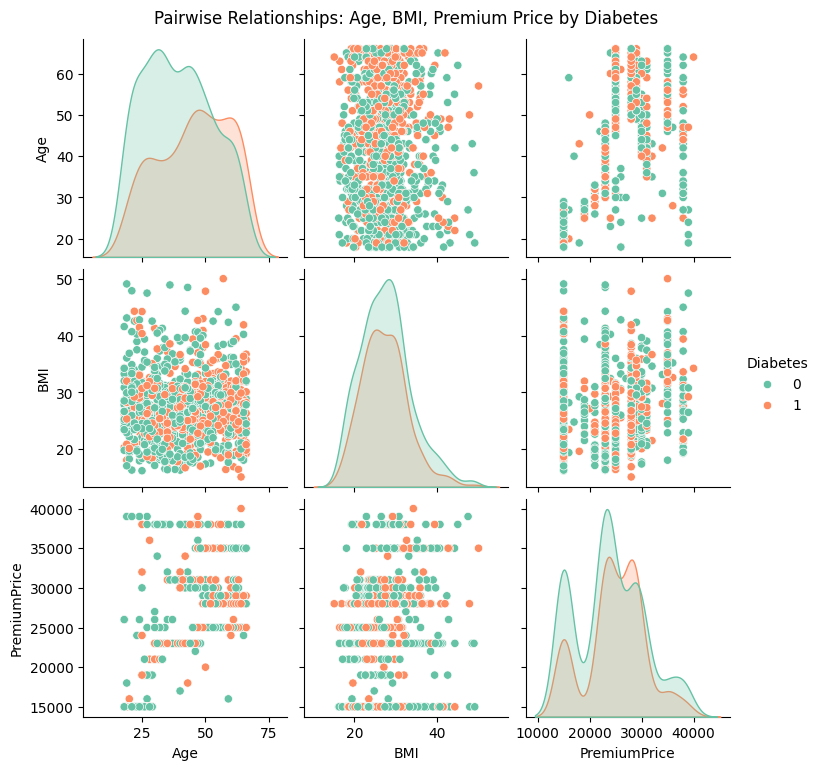


 Pairplot grouped by: AnyChronicDiseases


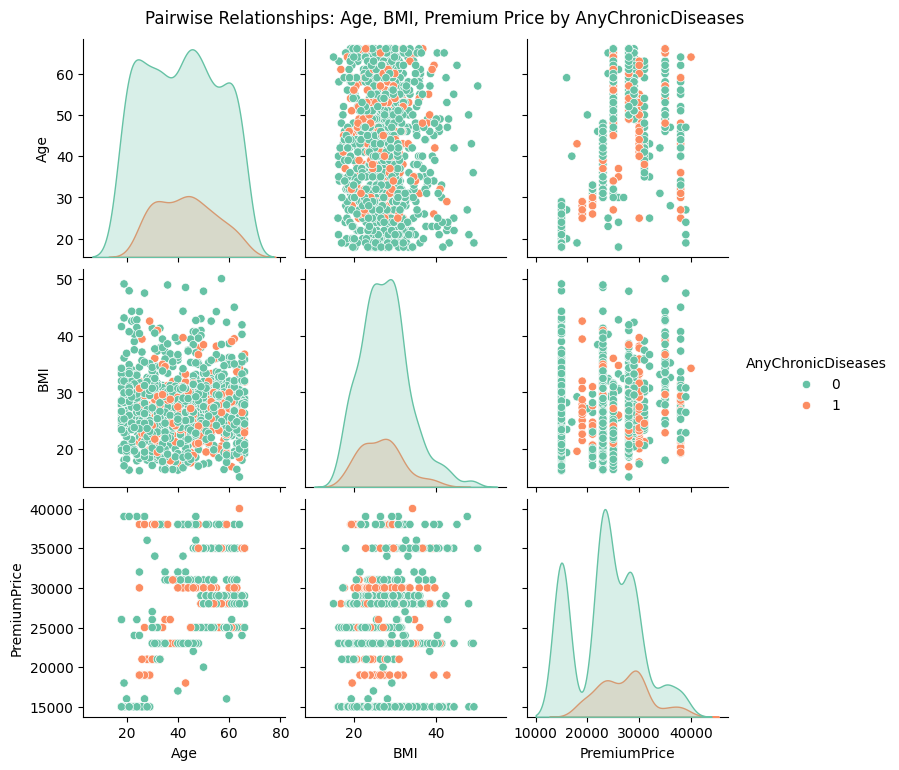


 Pairplot grouped by: BloodPressureProblems


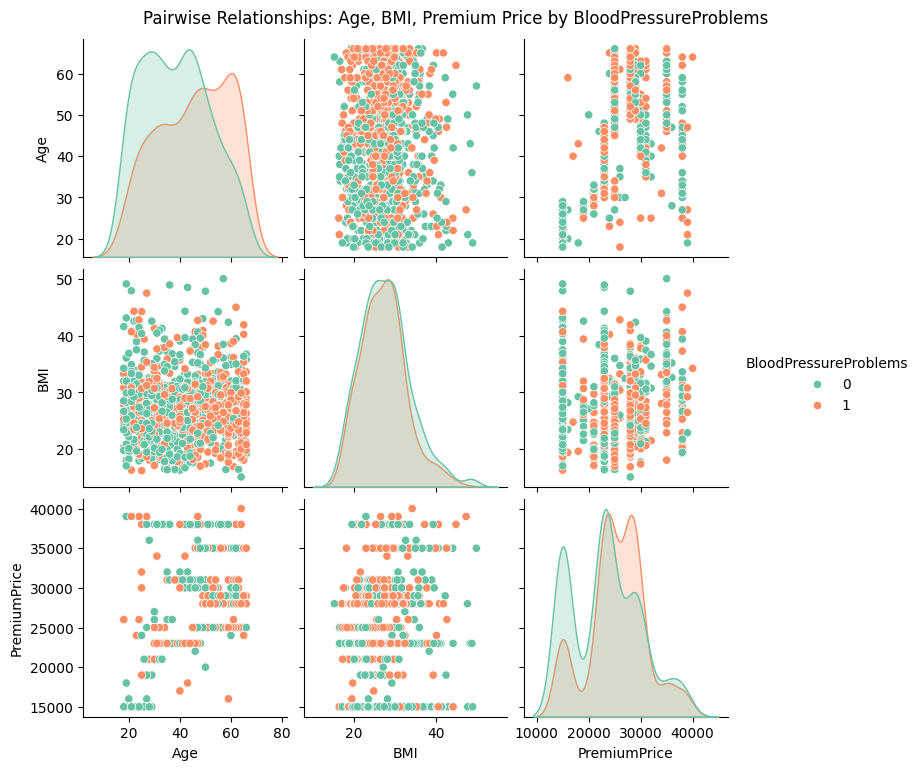


 Pairplot grouped by: AnyTransplants


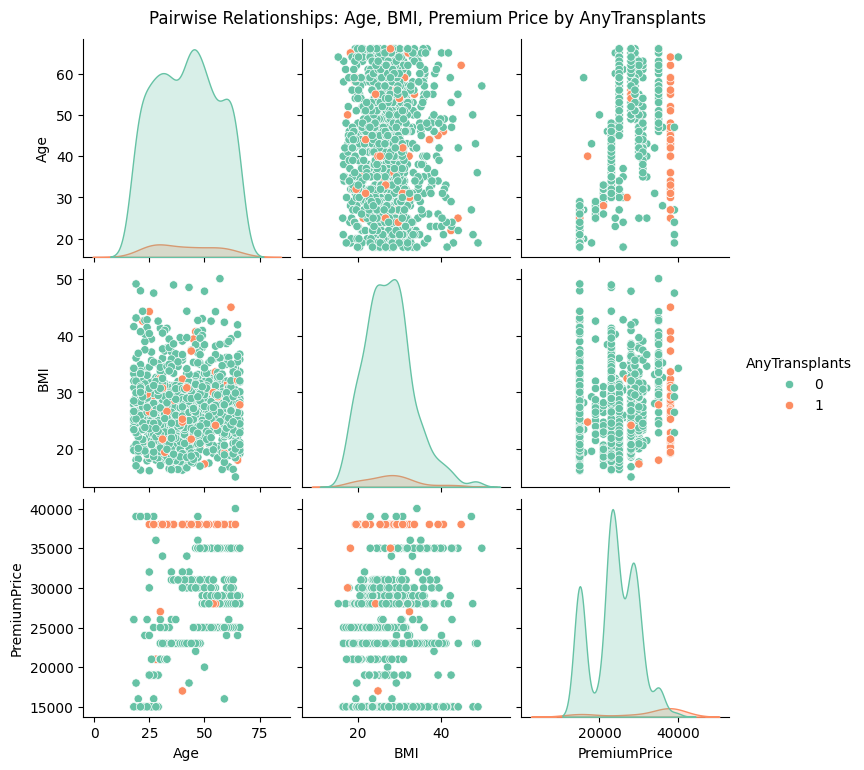


 Pairplot grouped by: KnownAllergies


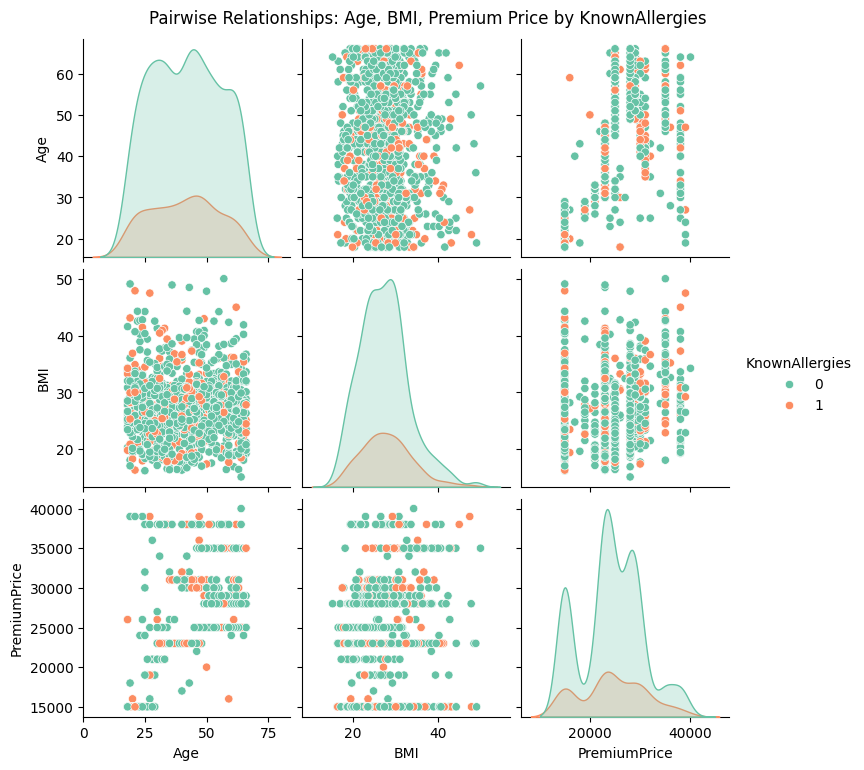


 Pairplot grouped by: BMI_Category


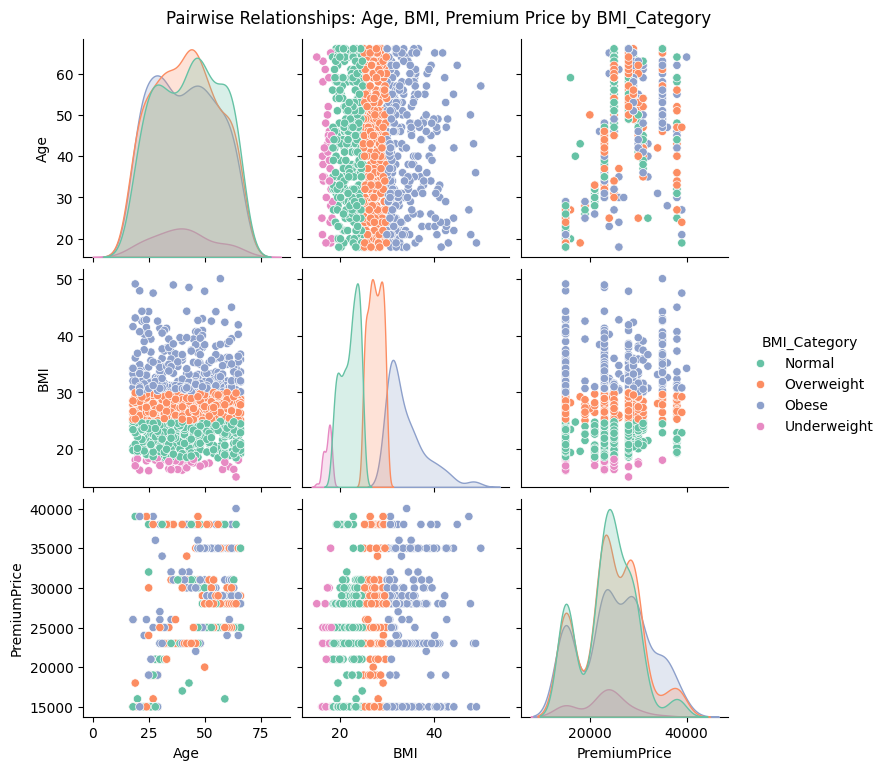

In [19]:
# Pairwise plots to explore interaction between Age, BMI, PremiumPrice across categories
categorical_cols = ['Diabetes', 'AnyChronicDiseases', 'BloodPressureProblems',
                    'AnyTransplants', 'KnownAllergies', 'BMI_Category']

# Creating pairplots for each category
for col in categorical_cols:
    print(f"\n Pairplot grouped by: {col}")
    sns.pairplot(df, vars=['Age', 'BMI', 'PremiumPrice'], hue=col, palette='Set2')
    plt.suptitle(f'Pairwise Relationships: Age, BMI, Premium Price by {col}', y=1.02)
    plt.show()

**Hypothesis Testing**

**T-Tests (for binary variables)**

In [20]:
# Performing independent t-test between group 0 (without condition) and group 1 (with condition)

import scipy.stats as stats

for var in binary_cats:
    group0 = df[df[var] == 0]['PremiumPrice']
    group1 = df[df[var] == 1]['PremiumPrice']
    t_stat, p_value = stats.ttest_ind(group0, group1)

    print(f"\nVariable: {var}")

    print("Null Hypothesis (H0): Mean PremiumPrice is the same for both groups.")

    print("Alternative Hypothesis (H1): Mean PremiumPrice differs between the two groups.")

    print(f"t-statistic = {t_stat:.3f}, p-value = {p_value:.4f}")

    if p_value < 0.05:
        print("Result: Reject the null hypothesis → Significant difference found.")
    else:
        print("Result: Fail to reject the null hypothesis → No significant difference.")


Variable: Diabetes
Null Hypothesis (H0): Mean PremiumPrice is the same for both groups.
Alternative Hypothesis (H1): Mean PremiumPrice differs between the two groups.
t-statistic = -2.398, p-value = 0.0167
Result: Reject the null hypothesis → Significant difference found.

Variable: BloodPressureProblems
Null Hypothesis (H0): Mean PremiumPrice is the same for both groups.
Alternative Hypothesis (H1): Mean PremiumPrice differs between the two groups.
t-statistic = -5.316, p-value = 0.0000
Result: Reject the null hypothesis → Significant difference found.

Variable: AnyTransplants
Null Hypothesis (H0): Mean PremiumPrice is the same for both groups.
Alternative Hypothesis (H1): Mean PremiumPrice differs between the two groups.
t-statistic = -9.472, p-value = 0.0000
Result: Reject the null hypothesis → Significant difference found.

Variable: AnyChronicDiseases
Null Hypothesis (H0): Mean PremiumPrice is the same for both groups.
Alternative Hypothesis (H1): Mean PremiumPrice differs betwe

**ANOVA (Number of Surgeries → Categorical Grouping)**

In [21]:
# Groups based on NumberOfMajorSurgeries
anova = stats.f_oneway(
    df[df['NumberOfMajorSurgeries'] == 0]['PremiumPrice'],
    df[df['NumberOfMajorSurgeries'] == 1]['PremiumPrice'],
    df[df['NumberOfMajorSurgeries'] == 2]['PremiumPrice'],
    df[df['NumberOfMajorSurgeries'] == 3]['PremiumPrice']
)

print("Null Hypothesis (H0): Mean PremiumPrice is the same across all surgery groups.")

print("Alternative Hypothesis (H1): At least one surgery group has a different mean PremiumPrice.")

print(f"F-statistic: {anova.statistic:.2f}, P-value: {anova.pvalue:.4f}")

if anova.pvalue < 0.05:
    print("Result: Reject the null hypothesis → Significant difference between groups.")
else:
    print("Result: Fail to reject the null hypothesis → No significant difference between groups.")


Null Hypothesis (H0): Mean PremiumPrice is the same across all surgery groups.
Alternative Hypothesis (H1): At least one surgery group has a different mean PremiumPrice.
F-statistic: 26.14, P-value: 0.0000
Result: Reject the null hypothesis → Significant difference between groups.


**ANOVA Test on BMI Category**

In [22]:
from scipy.stats import f_oneway

# Group PremiumPrice by BMI Category
groups = df.groupby('BMI_Category')['PremiumPrice'].apply(list)

# Perform one-way ANOVA
f_stat, p_val = f_oneway(*groups)

print("ANOVA Test: Relationship between BMI Category and Premium Price")
print("Null Hypothesis (H0): Mean PremiumPrice is the same across all BMI categories.")
print("Alternative Hypothesis (H1): At least one BMI category has a different mean PremiumPrice.")
print("F-statistic:", f_stat)
print("P-value:", p_val)

if p_val < 0.05:
    print("Result: Reject the null hypothesis → Significant difference found between BMI groups.")
else:
    print("Result: Fail to reject the null hypothesis → No significant difference between BMI groups.")


ANOVA Test: Relationship between BMI Category and Premium Price
Null Hypothesis (H0): Mean PremiumPrice is the same across all BMI categories.
Alternative Hypothesis (H1): At least one BMI category has a different mean PremiumPrice.
F-statistic: 4.1177007590554355
P-value: 0.006476135304300154
Result: Reject the null hypothesis → Significant difference found between BMI groups.


**Chi-square Test (between binary vars)**

In [23]:
# Creating a contingency table to count combinations of both categorical variables
contingency = pd.crosstab(df['AnyChronicDiseases'], df['HistoryOfCancerInFamily'])

# Performing Chi-square test of independence
# This checks whether there's a significant association between the two categorical variables
chi2, p, dof, expected = stats.chi2_contingency(contingency)

print("Chi-Square Test: AnyChronicDiseases vs. HistoryOfCancerInFamily")
print("Null Hypothesis (H0): The two variables are independent (no association).")
print("Alternative Hypothesis (H1): The two variables are dependent (there is an association).")
print(f"Chi-square statistic: {chi2:.2f}")
print(f"P-value: {p:.4f}")

if p < 0.05:
    print("Result: Reject the null hypothesis → Significant association exists.")
else:
    print("Result: Fail to reject the null hypothesis → No significant association found.")

Chi-Square Test: AnyChronicDiseases vs. HistoryOfCancerInFamily
Null Hypothesis (H0): The two variables are independent (no association).
Alternative Hypothesis (H1): The two variables are dependent (there is an association).
Chi-square statistic: 0.02
P-value: 0.8858
Result: Fail to reject the null hypothesis → No significant association found.


**Regression Analysis (With and Without Outliers)**

**Model with outliers**

In [24]:
import statsmodels.formula.api as smf
model = smf.ols('PremiumPrice ~ Age + Weight + BMI + AnyChronicDiseases + NumberOfMajorSurgeries', data=df).fit()
print(model.summary())

                            OLS Regression Results                            
Dep. Variable:           PremiumPrice   R-squared:                       0.544
Model:                            OLS   Adj. R-squared:                  0.542
Method:                 Least Squares   F-statistic:                     233.9
Date:                Sat, 17 May 2025   Prob (F-statistic):          2.48e-164
Time:                        10:13:14   Log-Likelihood:                -9629.1
No. Observations:                 986   AIC:                         1.927e+04
Df Residuals:                     980   BIC:                         1.930e+04
Df Model:                           5                                         
Covariance Type:            nonrobust                                         
                             coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------------------
Intercept               5319

**Insights from Model with Outliers:**

**Model Fit:**
The model explains about 54.4% of the variation in insurance premiums (PremiumPrice). This means the model captures a good portion of the factors influencing premiums, but there are still other factors not included in the model.

**Significant Predictors:**

**Age:** Older individuals tend to have higher premiums. For each additional year of age, the premium increases by about 317 rupees.

**Weight:** People with higher weight also tend to have higher premiums. For each additional unit of weight, the premium increases by about 58 rupees.

**Chronic Diseases:** Having chronic diseases significantly increases premiums. People with chronic diseases have premiums that are about 2911 rupees higher on average compared to those without chronic diseases.

**Number of Major Surgeries:** Although the effect is not statistically significant, it suggests that people with more surgeries may have slightly lower premiums. However, this result isn’t strong enough to rely on.

**Non-Significant Predictors:**

**BMI:** BMI doesn’t seem to have a significant effect on the premium prices in this model. The effect is small and not statistically significant, meaning we can’t confidently say that BMI impacts the premium.

**Residuals:**

The model’s residuals (the differences between actual and predicted premiums) suggest that the errors are not normally distributed, which might indicate the presence of outliers.

High skewness and kurtosis suggest that some extreme values may be influencing the results more than they should.

**Actual vs Predicted Visualization**

**With Outliers**

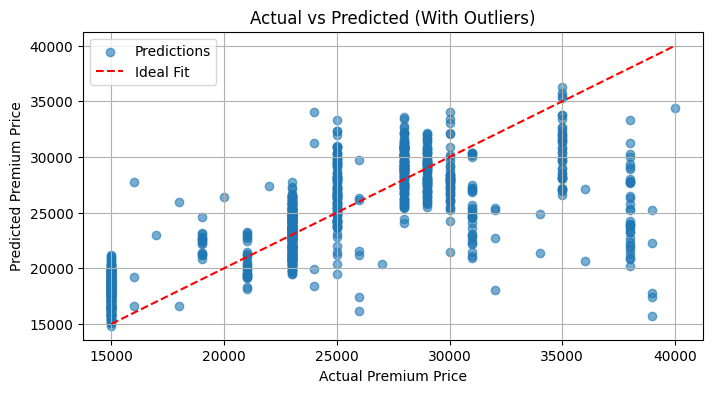

In [25]:
df['Pred_With_Outliers'] = model.predict(df)
plt.figure(figsize=(8, 4))
plt.scatter(df['PremiumPrice'], df['Pred_With_Outliers'], alpha=0.6, label='Predictions')
plt.plot([df['PremiumPrice'].min(), df['PremiumPrice'].max()],
         [df['PremiumPrice'].min(), df['PremiumPrice'].max()],
         color='red', linestyle='--', label='Ideal Fit')
plt.xlabel('Actual Premium Price')
plt.ylabel('Predicted Premium Price')
plt.title('Actual vs Predicted (With Outliers)')
plt.legend()
plt.grid(True)
plt.show()

**Model without Outliers**

In [26]:
# Model without outliers
df_wo = df[~df['PremiumPrice'].isin(outliers['PremiumPrice'])]  # Correctly filter out outliers
model_wo = smf.ols('PremiumPrice ~ Age + Weight + BMI + AnyChronicDiseases + NumberOfMajorSurgeries', data=df_wo).fit()
print(model_wo.summary())

                            OLS Regression Results                            
Dep. Variable:           PremiumPrice   R-squared:                       0.581
Model:                            OLS   Adj. R-squared:                  0.579
Method:                 Least Squares   F-statistic:                     270.5
Date:                Sat, 17 May 2025   Prob (F-statistic):          2.54e-181
Time:                        10:13:14   Log-Likelihood:                -9514.4
No. Observations:                 980   AIC:                         1.904e+04
Df Residuals:                     974   BIC:                         1.907e+04
Df Model:                           5                                         
Covariance Type:            nonrobust                                         
                             coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------------------
Intercept               5001

**Insights from the Model without Outliers:**

**Model Fit:**
The model now explains about 58.1% of the variation in insurance premiums, which is an improvement from the previous model. This suggests that removing outliers helped improve the model.

**Significant Factors:**

**Age:** Older individuals tend to have higher premiums. For each additional year of age, the premium increases by 326 rupees.

**Weight:** People with higher weight also have higher premiums. Each additional unit of weight increases the premium by about 64.65 rupees.

**Chronic Diseases:** People with chronic diseases have much higher premiums. On average, their premiums are about 2975.76 rupees higher compared to those without chronic diseases.

**Number of Surgeries:** Number of Major Surgeries: Although the effect is not statistically significant, it suggests that people with more surgeries may have slightly lower premiums. However, this result isn’t strong enough to rely on.

**Non-Significant Factors:**

**BMI:** BMI doesn’t seem to have a significant effect on premiums. The relationship is weak and not statistically important.

**Residuals:**

The residuals (the differences between actual and predicted premiums) are still not normally distributed, which suggests there might still be some extreme values affecting the results.

**Summary:**
Removing outliers improved the model’s fit and helped make some factors more significant. However, we still see signs that extreme values might be influencing the results. Further adjustments to the model might help improve the fit even more.

**Without Outliers**

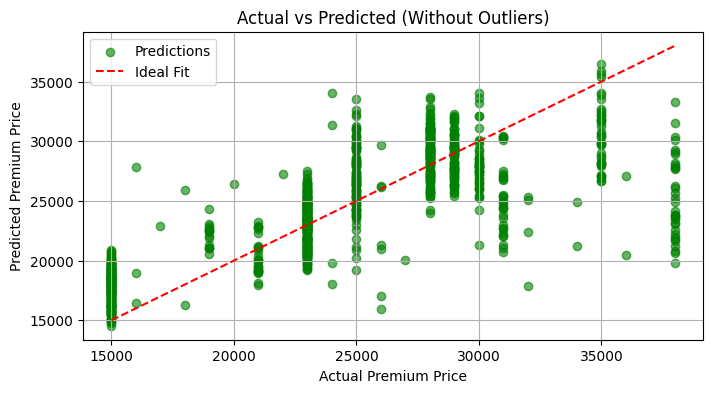

In [27]:
df_wo['Pred_Without_Outliers'] = model_wo.predict(df_wo)  # Add this line

plt.figure(figsize=(8, 4))
plt.scatter(df_wo['PremiumPrice'], df_wo['Pred_Without_Outliers'], alpha=0.6, color='green', label='Predictions')
plt.plot([df_wo['PremiumPrice'].min(), df_wo['PremiumPrice'].max()],
         [df_wo['PremiumPrice'].min(), df_wo['PremiumPrice'].max()],
         color='red', linestyle='--', label='Ideal Fit')
plt.xlabel('Actual Premium Price')
plt.ylabel('Predicted Premium Price')
plt.title('Actual vs Predicted (Without Outliers)')
plt.legend()
plt.grid(True)
plt.show()

**ML Modeling**

**Defining numerical and categorical features**

In [28]:
num_features = ['Age', 'Height', 'Weight', 'BMI', 'NumberOfMajorSurgeries']
cat_features = ['Diabetes', 'BloodPressureProblems', 'AnyTransplants',
                'AnyChronicDiseases', 'KnownAllergies', 'HistoryOfCancerInFamily']

**Feature & Target Split**

In [29]:
X = df[num_features + cat_features]
y = df['PremiumPrice']

**Train-test split**

In [30]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

**Scaling numerical features**

In [31]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
X_train[num_features] = scaler.fit_transform(X_train[num_features])
X_test[num_features] = scaler.transform(X_test[num_features])

We don’t need encoding because all categorical columns (eg: Diabetes, Allergies) are already numeric binary (0/1).

**Model Training**

**Linear Regression (Baseline Model)**

In [32]:
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score

lr = LinearRegression()
lr.fit(X_train, y_train)
y_pred_lr = lr.predict(X_test)

mae_lr = mean_absolute_error(y_test, y_pred_lr)  # Calculating MAE
rmse_lr = np.sqrt(mean_squared_error(y_test, y_pred_lr))  # Calculating RMSE
r2_lr = r2_score(y_test, y_pred_lr)  # Calculating R-squared

print("Linear Regression")
print("MAE:", mae_lr)
print("RMSE:", rmse_lr)
print("Rsquare:", r2_lr)

Linear Regression
MAE: 2586.1817100200624
RMSE: 3494.4137981898157
Rsquare: 0.713646143964974


**Model Scores Insights:**

**MAE** (2586.18): On average, the prediction error is around ₹2,586.

**RMSE** (3494.41): Larger errors exist, with predictions off by roughly ₹3,494.

**Rsquare** (0.71): The model explains 71% of the variance in premiums, leaving 29% unexplained.

**Visualization: Actual vs Predicted**

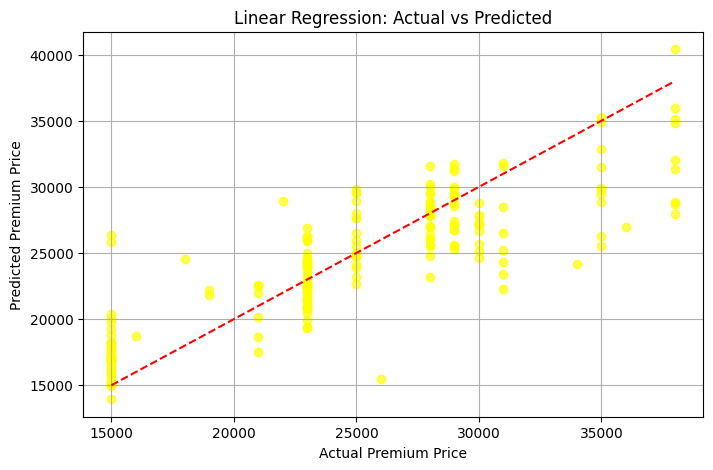

In [33]:
plt.figure(figsize=(8,5))
plt.scatter(y_test, y_pred_lr, alpha=0.7, color='yellow')
plt.xlabel("Actual Premium Price")
plt.ylabel("Predicted Premium Price")
plt.title("Linear Regression: Actual vs Predicted")
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'r--')
plt.grid(True)
plt.show()

**Random Forest Regressor**

In [34]:
from sklearn.ensemble import RandomForestRegressor

rf = RandomForestRegressor(random_state=42)
rf.fit(X_train, y_train)
y_pred_rf = rf.predict(X_test)

mae_rf = mean_absolute_error(y_test, y_pred_rf)  # Calculating MAE
rmse_rf = np.sqrt(mean_squared_error(y_test, y_pred_rf))  # Calculating RMSE
r2_rf = r2_score(y_test, y_pred_rf)  # Calculating R-squared

print("Random Forest")
print("MAE:", mae_rf)
print("RMSE:", rmse_rf)
print("Rsquare:", r2_rf)

Random Forest
MAE: 1038.1313131313132
RMSE: 2141.258598076931
Rsquare: 0.8924791689995263


**Model Scores Insights:**

**MAE** (1038.13): The prediction error is much lower than linear regression, with an average error of ₹1,038.

**RMSE** (2141.26): The larger errors are less than linear regression, with an average deviation of ₹2,141.

**Rsquare** (0.89): The model explains 89.25% of the variance, a significant improvement over linear regression (71%). This indicates a better fit.

Random Forest outperforms Linear Regression in accuracy, with lower errors and higher explained variance.

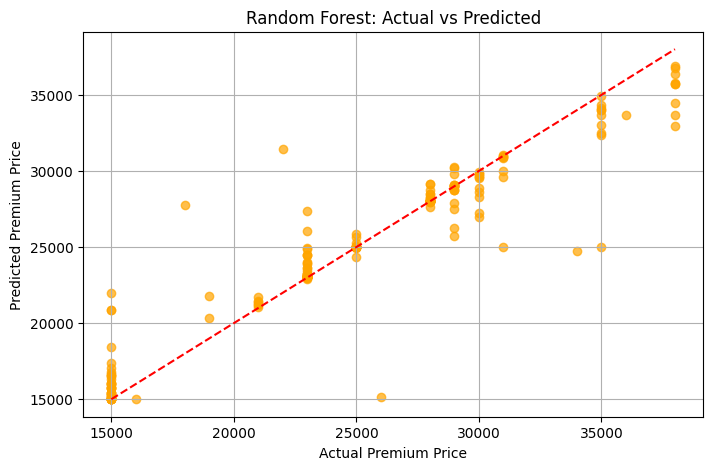

In [35]:
plt.figure(figsize=(8,5))
plt.scatter(y_test, y_pred_rf, alpha=0.7, color='orange')
plt.xlabel("Actual Premium Price")
plt.ylabel("Predicted Premium Price")
plt.title("Random Forest: Actual vs Predicted")
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'r--')
plt.grid(True)
plt.show()

**Cross-Validation**

In [36]:
from sklearn.model_selection import cross_val_score

cv_scores = cross_val_score(rf, X, y, cv=5, scoring='neg_root_mean_squared_error')
print("Cross-validated RMSE:", -cv_scores.mean())

Cross-validated RMSE: 2844.8953069814947


**Insights:**

**Cross-validated RMSE** (2844.90) is slightly higher than the initial RMSE (2141.26), indicating some variability in model performance across different data subsets.

* The model is still robust, with reasonable error across folds, but slight fluctuations suggest sensitivity to data variations.

**Gradient Boosting Regressor**

In [37]:
from sklearn.ensemble import GradientBoostingRegressor

# Training the model
gb_model = GradientBoostingRegressor(random_state=42)
gb_model.fit(X_train, y_train)

# Predict
y_pred_gb = gb_model.predict(X_test)

# Evaluate
mae_gb = mean_absolute_error(y_test, y_pred_gb)
rmse_gb = np.sqrt(mean_squared_error(y_test, y_pred_gb))
r2_gb = r2_score(y_test, y_pred_gb)

print("Gradient Boosting")
print("MAE:", mae_gb)
print("RMSE:", rmse_gb)
print("Rsquare:", r2_gb)

Gradient Boosting
MAE: 1523.096551207175
RMSE: 2382.5923653488912
Rsquare: 0.8668767645637818


**Insights for Gradient Boosting:**

**MAE** (1523.10): The average prediction error is ₹1,523, higher than Random Forest but lower than Linear Regression.

**RMSE** (2382.59): The RMSE is also between Random Forest and Linear Regression, indicating moderate prediction errors.

**Rsquare** (0.87): The model explains 86.69% of the variance, which is lower than Random Forest (89.25%) but still a good fit.

Gradient Boosting performs well, with lower error than Linear Regression but slightly less explained variance than Random Forest.

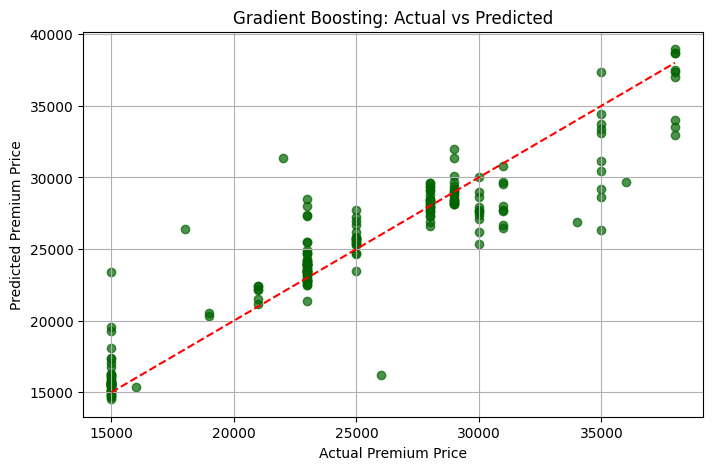

In [38]:
plt.figure(figsize=(8,5))
plt.scatter(y_test, y_pred_gb, alpha=0.7, color='darkgreen')
plt.xlabel("Actual Premium Price")
plt.ylabel("Predicted Premium Price")
plt.title("Gradient Boosting: Actual vs Predicted")
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'r--')
plt.grid(True)
plt.show()

**Comparing All Models Together**

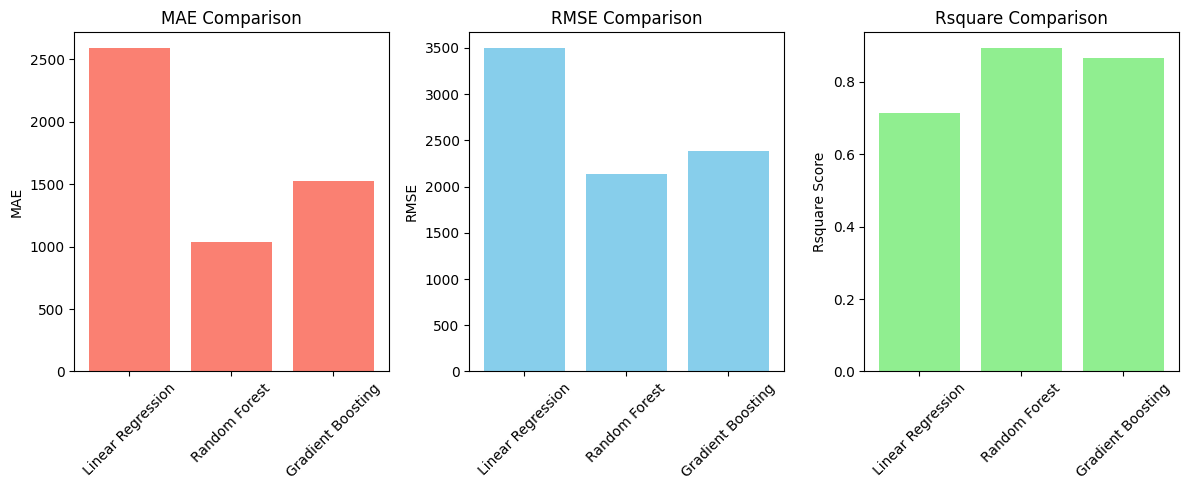

In [39]:
models = ['Linear Regression', 'Random Forest', 'Gradient Boosting']
mae_scores = [mae_lr, mae_rf, mae_gb]
rmse_scores = [rmse_lr, rmse_rf, rmse_gb]
r2_scores = [r2_lr, r2_rf, r2_gb]

plt.figure(figsize=(12,5))

# MAE
plt.subplot(1, 3, 1)
plt.bar(models, mae_scores, color='salmon')
plt.title('MAE Comparison')
plt.xticks(rotation=45)
plt.ylabel('MAE')

# RMSE
plt.subplot(1, 3, 2)
plt.bar(models, rmse_scores, color='skyblue')
plt.title('RMSE Comparison')
plt.xticks(rotation=45)
plt.ylabel('RMSE')

# Rsqaure Score
plt.subplot(1, 3, 3)
plt.bar(models, r2_scores, color='lightgreen')
plt.title('Rsquare Comparison')
plt.xticks(rotation=45)
plt.ylabel('Rsquare Score')

plt.tight_layout()
plt.show()

**Feature Importance with Random Forest**

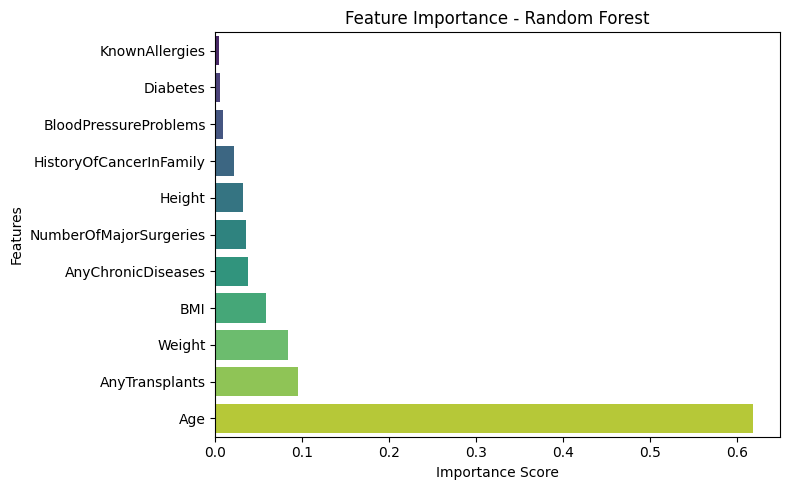

In [40]:
importances = rf.feature_importances_
features = X_train.columns
indices = np.argsort(importances)

plt.figure(figsize=(8,5))
sns.barplot(x=importances[indices], y=features[indices], palette="viridis")
plt.title("Feature Importance - Random Forest")
plt.xlabel("Importance Score")
plt.ylabel("Features")
plt.tight_layout()
plt.show()

**GridSearch CV**

In [41]:
from sklearn.model_selection import GridSearchCV

param_grid = {
    'n_estimators': [100, 200],
    'max_depth': [None, 10, 20],
    'min_samples_split': [2, 5]
}

grid_search = GridSearchCV(RandomForestRegressor(random_state=42), param_grid, cv=5, scoring='neg_mean_squared_error')
grid_search.fit(X_train, y_train)

best_rf = grid_search.best_estimator_
y_pred = best_rf.predict(X_test)

# Calculating MSE and then take the square root to get RMSE
mse = mean_squared_error(y_test, y_pred)
rmse = np.sqrt(mse)
print("Tuned Random Forest RMSE:", rmse)

Tuned Random Forest RMSE: 2053.6723793631895


In [42]:
mae = mean_absolute_error(y_test, y_pred)
rmse_score = np.sqrt(mean_squared_error(y_test, y_pred))
r2_score = r2_score(y_test, y_pred)

print("Tuned Random Forest MAE:", mae)
print("Tuned Random Forest RMSE:", rmse)
print("Tuned Random Forest Rsquare:", r2_score)

Tuned Random Forest MAE: 984.1326557517874
Tuned Random Forest RMSE: 2053.6723793631895
Tuned Random Forest Rsquare: 0.9010953530885086


**Insights:**

**MAE Reduction (from 1038 → 984):**
The Mean Absolute Error dropped by 5%, reflecting that the tuned model provides more consistently accurate predictions on average, with lower absolute deviation from actual premium values.

**Tuned RMSE** **(2053.67):** The RMSE has improved from the original Random Forest model (2141.26), indicating better prediction accuracy after tuning.

**Rsquare Score Improvement (0.892 → 0.901):**
A higher Rsquare value (90.1%) means the tuned model now explains more variance in premium prices, suggesting it captures complex patterns in the data more effectively than the untuned version.

Tuned Random Forest performs better than the initial model, with lower prediction errors, showcasing the effectiveness of hyperparameter tuning in improving model performance.

In [43]:
import zipfile

with zipfile.ZipFile('insurance_premium_app.zip', 'w') as zipf:
    zipf.write('insurance_best_model.pkl')
    zipf.write('scaler.pkl')

In [44]:
from google.colab import files
files.download('insurance_premium_app.zip')

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

**Insights:**

* The Tuned Random Forest Regressor outperformed all other models, achieving the lowest RMSE (2053.67) and highest Rsquare score (0.901), indicating strong predictive performance and the ability to explain over 90% of the variance in premium prices.

* MAE improved to 984, suggesting that on average, the model's predictions are off by less than ₹1,000, making it highly practical for estimating individual insurance premiums.

* Tuning helped reduce prediction errors compared to the base Random Forest (RMSE reduced from 2141 to 2053), showcasing the impact of hyperparameter optimization.

* While Age remains the strongest predictor of premium (r = 0.70), factors such as AnyTransplants, Surgeries, and Chronic Diseases also contribute significantly, validating the model's reliance on meaningful health indicators.

* Weak correlations with variables like BMI, Diabetes, and Allergies emphasize the need for feature importance analysis to filter less relevant inputs for future modeling.

* Statistical tests (T-tests, ANOVA, Chi-Square) further confirmed significant differences in premium prices across health conditions, supporting the validity of selected features.


**Recommendations:**

**1. Refine Pricing Strategy Based on Strong Predictors**
* Age shows the strongest correlation (r = 0.70) with insurance premiums. Pricing models should prioritize age segmentation.
* Introduce age-based pricing tiers and consider incentives for older individuals to engage in preventive health programs.

**2. Incorporate Key Health Indicators into Risk Models**
* Variables like AnyTransplants, NumberOfMajorSurgeries, and AnyChronicDiseases show moderate correlation with premium and statistically significant differences in t-tests.
* These should be explicitly factored into underwriting algorithms to reflect increased risk.
* Personalized care plans or early health intervention strategies could be offered to these high-risk segments.

**3. Leverage BMI Categories More Effectively**
* While raw BMI correlation is weak (r = 0.10), ANOVA reveals significant differences across BMI groups.
* Consider including BMI categories as categorical features in modeling and health-risk assessments.
* Offer wellness incentives to promote healthier BMI ranges.

**4. Re-examine the Role of Low-Correlation Variables**
* Conditions like Diabetes, Allergies, and Family Cancer History show weak correlation and, in some cases, no significant effect on premiums.
* These variables could still be useful when combined with others in interaction terms.

**5. Model Selection & Monitoring**
* The Random Forest model outperformed Linear Regression and Gradient Boosting (RMSE: 2053, Rsquare: 0.90).
* Adopt Random Forest as the core model, and continue hyperparameter tuning for improved accuracy.

**6. Continuous Improvement:**
* Monitor model performance over time and periodically retrain with new data to ensure the model adapts to trends in healthcare and insurance pricing.

**7. Future Enhancements**
* Add demographic or behavioral data (e.g., smoking habits, physical activity) if available.
* Implement cross-validation pipelines to improve model generalizability.